#### Diabetes Prediction Using Machine Learning

##### Importing libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import pickle


%matplotlib inline



##### let reading the dataset which is in the CSV format

In [2]:
data = pd.read_csv('E:\Data Sciense\DataSet\diabetes\diabetes.csv')

#### Exploratory Data Analysis (EDA)

##### Information about the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### let's check the number of null values in dataset

In [5]:
data.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Data Visualiaztion

##### let’s check that how well our outcome column is balanced

In [8]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome'>

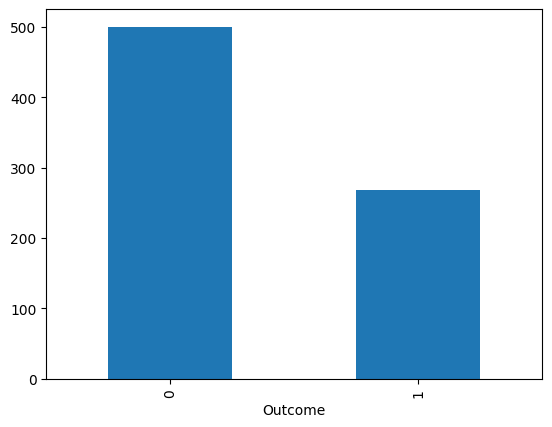

In [9]:
data.Outcome.value_counts().plot(kind = 'bar')

##### In the above visualization , it is quite clear that our dataset is completely imbalanced. In fact, the number of diabetic patients is half of the number of non-diabetic patients



#### Corelation between all the features

<Axes: >

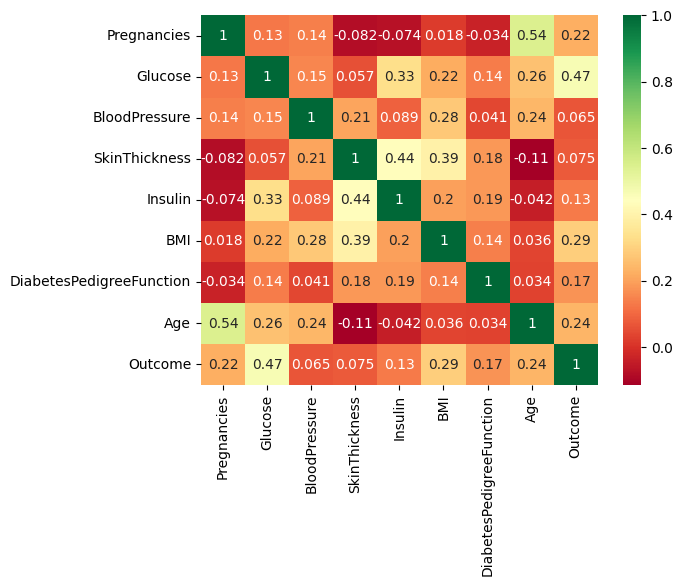

In [10]:
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

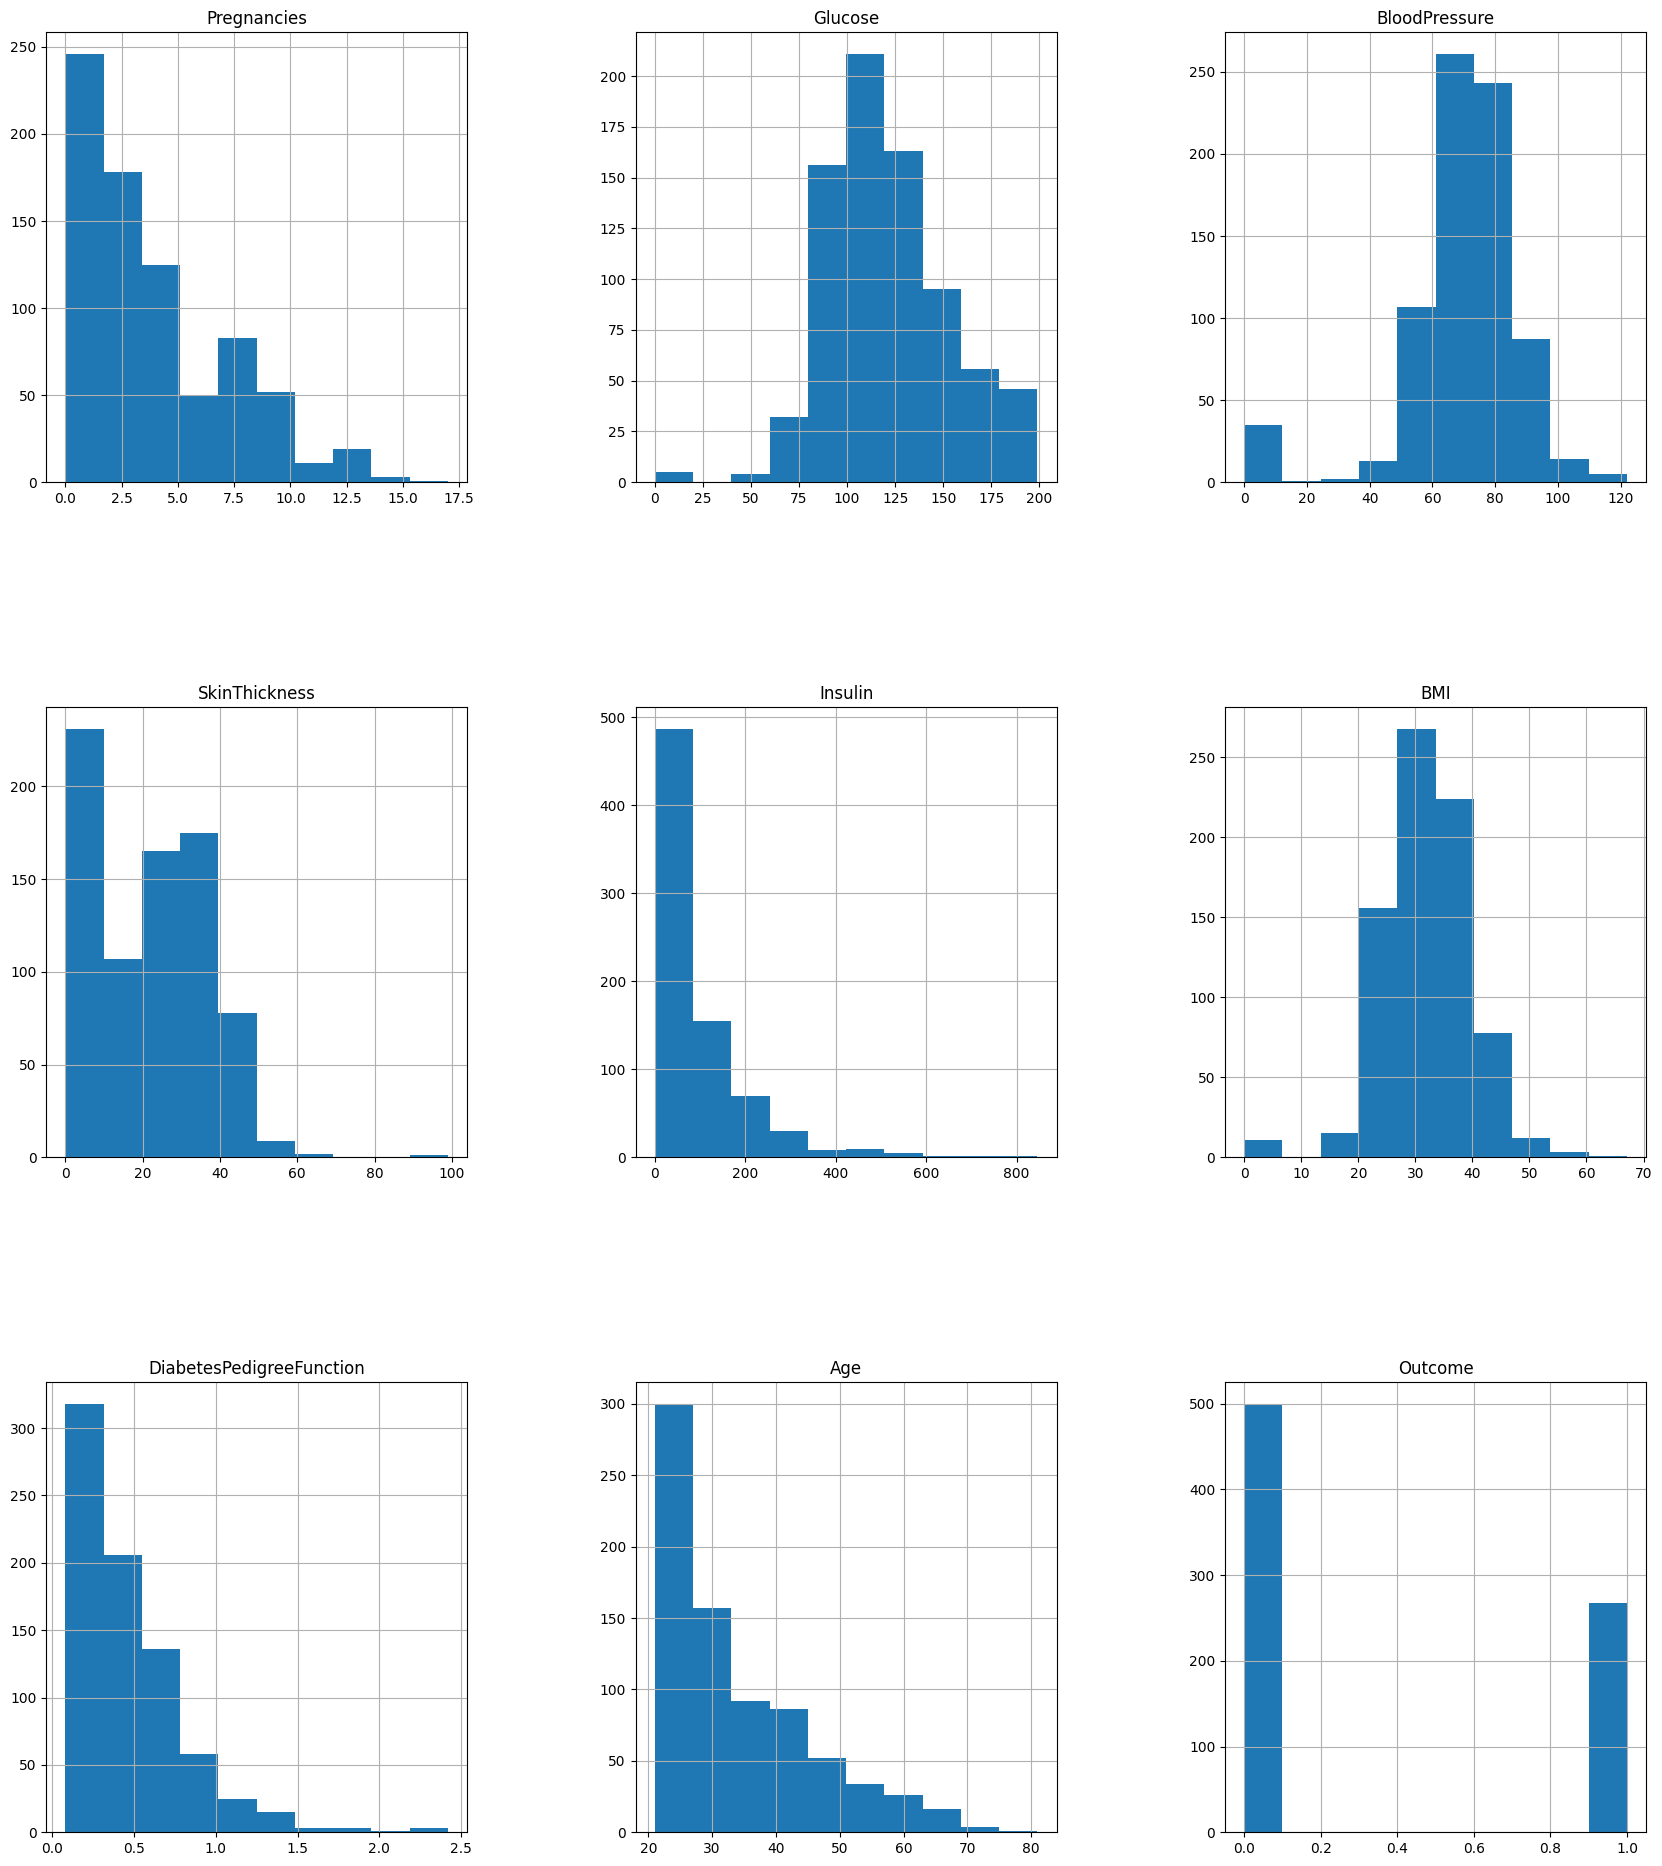

In [11]:
data.hist(figsize = (20,20))
plt.subplots_adjust(left=0.1,
                    bottom=0, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)
plt.show()

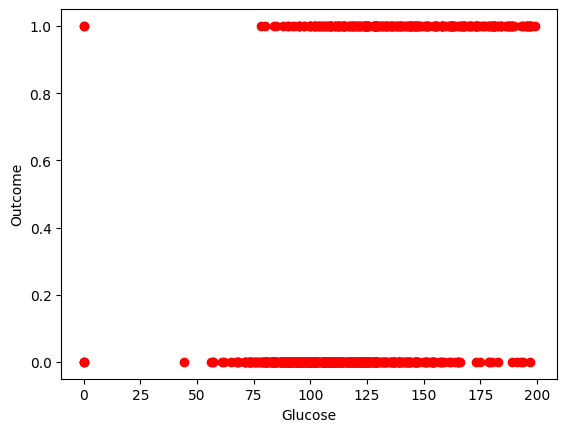

In [12]:
plt.scatter(data.Glucose, data.Outcome, color = 'red')
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.show()

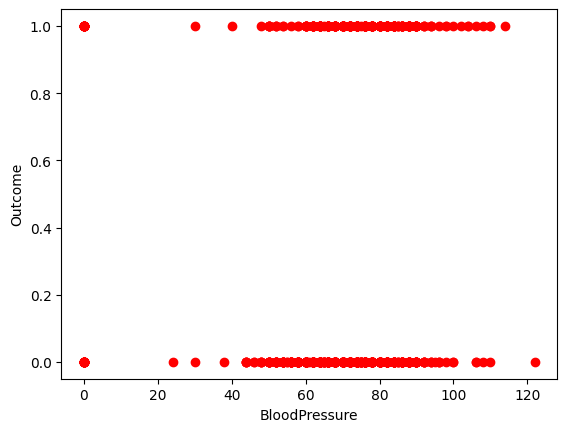

In [13]:
plt.scatter(data.BloodPressure, data.Outcome, color = 'red')
plt.xlabel('BloodPressure')
plt.ylabel('Outcome')
plt.show()

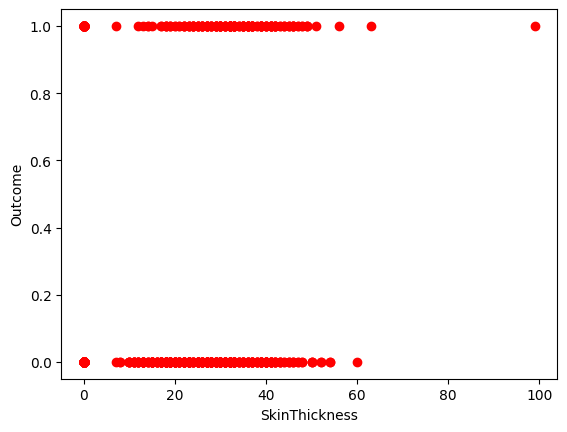

In [14]:
plt.scatter(data.SkinThickness, data.Outcome, color = 'red')
plt.xlabel('SkinThickness')
plt.ylabel('Outcome')
plt.show()

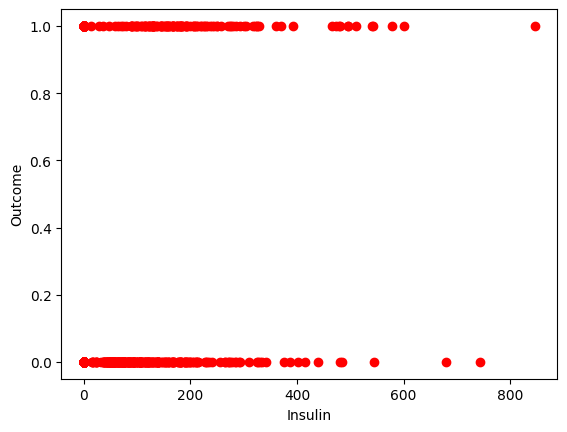

In [15]:
plt.scatter(data.Insulin, data.Outcome, color = 'red')
plt.xlabel('Insulin')
plt.ylabel('Outcome')
plt.show()

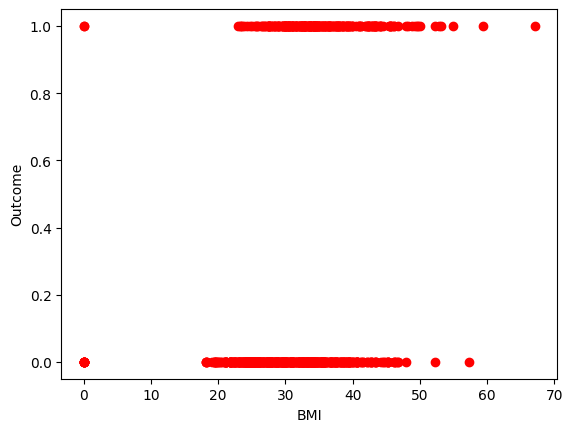

In [16]:
plt.scatter(data.BMI, data.Outcome, color = 'red')
plt.xlabel('BMI')
plt.ylabel('Outcome')
plt.show()

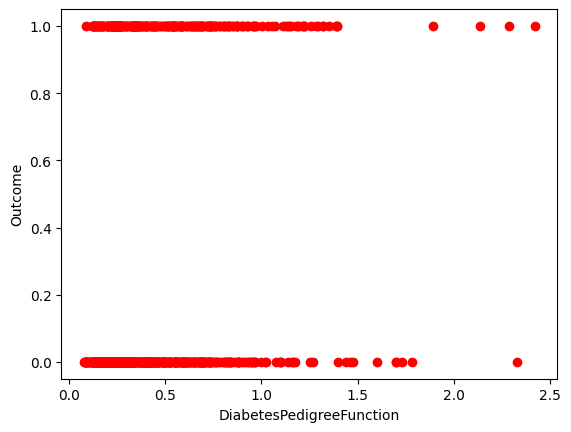

In [17]:
plt.scatter(data.DiabetesPedigreeFunction, data.Outcome, color = 'red')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Outcome')
plt.show()

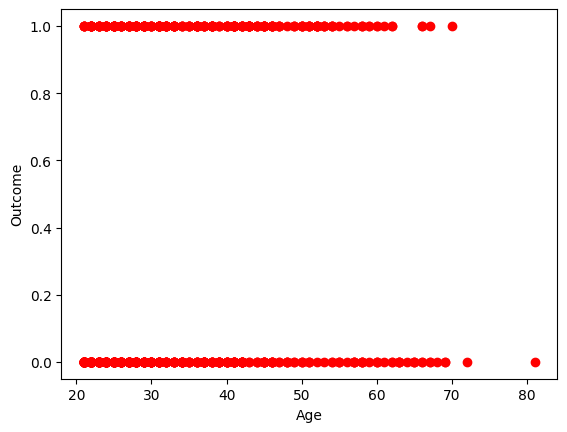

In [18]:
plt.scatter(data.Age, data.Outcome, color = 'red')
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.show()

#### Scaling th Dada

In [19]:
cdata = data.copy(deep = True)

cdata_scaled = StandardScaler().fit_transform(cdata.drop("Outcome", axis=1),cdata.to_numpy())
cdata_scaled = pd.DataFrame(cdata_scaled, columns = ['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
cdata_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


#### Model Building

##### Spliting the dataset

In [20]:
X = cdata_scaled
y = cdata[['Outcome']]


##### Creating train and test dataset¶

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#### Random Forest

In [22]:
model_rf = RandomForestClassifier(n_estimators = 200)
model_rf.fit(X_train, y_train)

C:\Users\IRAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=200)

##### Getting the accuracy score for Random Forest

In [23]:
prediction_rf = model_rf.predict(X_test)

print("Accuracy Score = ", format(metrics.accuracy_score(y_test, prediction_rf)))


Accuracy Score =  0.7705627705627706


##### classification report and confusion matrix of random forest model

In [24]:
print(metrics.confusion_matrix(y_test, prediction_rf))



[[138  19]
 [ 34  40]]


In [25]:
print(metrics.classification_report(y_test, prediction_rf))


              precision    recall  f1-score   support

           0       0.80      0.88      0.84       157
           1       0.68      0.54      0.60        74

    accuracy                           0.77       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231



#### Decision Tree

In [26]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

##### predictions and getting the accuracy score for decision tree

In [27]:
dt_prediction = model_dt.predict(X_test)
print("the accuracy score : ", format(metrics.accuracy_score(y_test, dt_prediction)))

the accuracy score :  0.7445887445887446


##### classification report and confusion matrix of decision tree model

In [28]:
print(metrics.confusion_matrix(y_test, dt_prediction))

[[125  32]
 [ 27  47]]


In [29]:
print(metrics.classification_report(y_test, dt_prediction))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       157
           1       0.59      0.64      0.61        74

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.75      0.74      0.75       231



#### Xgboost Classifier

In [30]:
model_xgb = XGBClassifier(gamma=0)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

##### Getting the accuracy score for the XgBoost classifier

In [31]:
xgb_prediction = model_xgb.predict(X_test)
print("Accuracy Score = ", format(metrics.accuracy_score(y_test, xgb_prediction)))

Accuracy Score =  0.7748917748917749


##### Classification report and confusion matrix of the XgBoost classifier

In [33]:
print(metrics.confusion_matrix(y_test, xgb_prediction))

[[132  25]
 [ 27  47]]


In [34]:
print(metrics.classification_report(y_test, xgb_prediction))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       157
           1       0.65      0.64      0.64        74

    accuracy                           0.77       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231



#### Sopport Vector Machine

In [36]:
model_svc = SVC()
model_svc.fit(X_train, y_train)


C:\Users\IRAN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

##### Prediction from support vector machine model on the testing data

In [38]:
svc_prediction = model_svc.predict(X_test)

##### Accuracy score for SVM

In [39]:
print("accuracy_score = ", format(metrics.accuracy_score(y_test, svc_prediction)))

accuracy_score =  0.7532467532467533


##### Classification report and confusion matrix of the SVM classifier

In [41]:
print(metrics.confusion_matrix(y_test, svc_prediction))

[[138  19]
 [ 38  36]]


In [42]:
print(metrics.classification_report(y_test, svc_prediction))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       157
           1       0.65      0.49      0.56        74

    accuracy                           0.75       231
   macro avg       0.72      0.68      0.69       231
weighted avg       0.74      0.75      0.74       231



#### Conclusion

##### both random forest and xgboost is the best models for this prediction with accuracy score 0.77

#### Feature Importance

##### The feature importance shows which feature has the most impact in the model building stage

##### Getting feature importances

In [43]:
model_rf.feature_importances_

array([0.0859152 , 0.25556109, 0.0838101 , 0.06731222, 0.07174778,
       0.16489567, 0.12318763, 0.1475703 ])

##### Plotting feature importances for make a visualization

<Axes: >

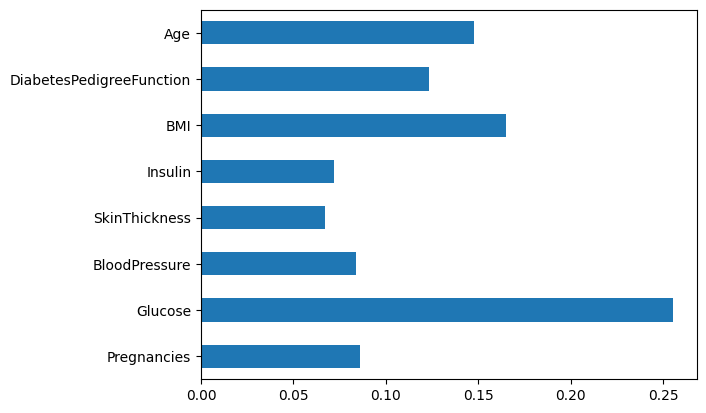

In [44]:
pd.Series(model_rf.feature_importances_, index = X.columns).plot(kind='barh')

##### In the graph above, it is clear that glucose has the greatest effect